In [18]:
import time
import random

In [16]:
def foo_time(foo, *args, n_iterations=100):
    min_time = float('inf')
    for _ in range(n_iterations):
        t0 = time.perf_counter()
        foo(*args)
        t1 = time.perf_counter()
        min_time = min(min_time, t1 - t0)
    return min_time

# Binary search

The first given line contains an integer $1≤n≤10^5$ and an array $A[1…n]$ of $n$ different natural numbers not exceeding $10^9$ in ascending order, the second line contains an integer $1≤ k≤10^5$ and $k$ natural numbers $b_1, ..., b_k$ not exceeding $10^9$. For each $i$ from 1 to $k$, print the index $1≤j≤n$ for which $A[j]=b_i$, or $−1$ if there is no such $j$.

Sample Input:
```mermaid
5 1 5 8 12 13
5 8 1 23 1 11
```
Sample Output:
```mermaid
3 1 -1 1 -1
```

In [9]:
def binary_search(arr, tgt, n_src):
    l_border = 0
    r_border = n_src - 1
    
    while r_border - l_border >= 0:
        center_idx = (r_border + l_border)//2
        if arr[center_idx] == tgt:
            return center_idx + 1        
        if arr[center_idx] < tgt:
            l_border = center_idx + 1
        else:
            r_border = center_idx - 1
       
    return -1
    

# n_src, *src = map(int, input().split())
# n_tgt, *tgt = map(int, input().split())
input_data = [[5, 1, 5, 8, 12, 13], [5, 8, 1, 23, 1, 11]]
n_src, *src = input_data[0]
n_tgt, *tgt = input_data[1]

res = []
for el in tgt:
    res.append(binary_search(src, el, n_src))
print(' '.join(list(map(str, input[0]))))
print(' '.join(list(map(str, input[1]))))
print()
print(' '.join(list(map(str, res))))

5 1 5 8 12 13
5 8 1 23 1 11

3 1 -1 1 -1


In [11]:
def test_binary_search():
    assert binary_search([], 42, 0) == -1, 'Empty src process error'
    assert binary_search([42], 24, 1) == -1, 'OOV process error'
    assert binary_search([42], 42, 1) == 1, 'Look up error'
test_binary_search()

# Inversions counter (using merge sort)

The first given line contains the number $1≤n≤10^5$, the second one contains the array $A[1…n]$ containing natural numbers not exceeding $10^9$. The task is to count the number of pairs of indices $1≤i<j≤n$ for which $A[i]>A[j]$. (Such a pair of elements is called an array inversion. The number of inversions in an array is, in a sense, a measure of its disorder: for example, in a non-decreasing array, there are no inversions at all, but in a descending array, every two elements form an inversion.)

Sample Input:
```mermaid
5
2 3 9 2 9
```
Sample Output:
```mermaid
2
```

In [14]:
from collections import deque
import sys


def merge(arr1, arr2):
    inversion_cntr = 0
    sorted_arr = deque()

    while len(arr1) * len(arr2) > 0:
        if arr1[0] < arr2[0]:
            sorted_arr.append(arr1.popleft())            
        elif arr1[0] > arr2[0]:
            sorted_arr.append(arr2.popleft())
            inversion_cntr += len(arr1)
        else:
            while len(arr1) > 0 and arr1[0] == arr2[0]:
                sorted_arr.append(arr1.popleft())
            sorted_arr.append(arr2.popleft())
            inversion_cntr += len(arr1)
    
    while len(arr1) > 0:
        sorted_arr.append(arr1.popleft())
    while len(arr2) > 0:
        sorted_arr.append(arr2.popleft())
    
    return sorted_arr, inversion_cntr

def merge_inversions(arr):
    squeezed_queue = deque([deque([el]) for el in arr])
    n_inversions = 0
    curren_lvl_length = len(squeezed_queue)//2
    while len(squeezed_queue) > 1:
        initial_len = len(squeezed_queue)
        for i in range(curren_lvl_length):
            fst_el = squeezed_queue.popleft()
            snd_el = squeezed_queue.popleft()        
            merged_el, n_iter_inversions = merge(fst_el, snd_el)    
            n_inversions += n_iter_inversions
            squeezed_queue.append(merged_el)
        if initial_len%2 != 0 and len(squeezed_queue) > 1:
            fst_el = squeezed_queue.popleft()
            snd_el = squeezed_queue.pop()        
            merged_el, n_iter_inversions = merge(snd_el, fst_el)    
            n_inversions += n_iter_inversions
            squeezed_queue.append(merged_el)
        curren_lvl_length = len(squeezed_queue)//2
    return n_inversions

input_data = [5, [2, 3, 9, 2, 9]]
n_numbers = input_data[0]
arr = input_data[1]

n_inversions = merge_inversions(arr)

print(input_data[0])
print(' '.join(list(map(str, input_data[1]))))
print()
print(n_inversions)

5
2 3 9 2 9

2


## Inversion counter test

In [19]:
import numpy as np

def get_inversed_pairs_number(A):
    # Naive alg version O(n^2)
    result = 0
    if len(A) < 2:
        return result
    for i, element in enumerate(A):
        for j, element2 in enumerate(A[i + 1:]):
            if element > element2:
                result += 1

    return result

for k in range(998):
    random_test = np.random.randint(0, 10, 1000).tolist()
    naive_answer = get_inversed_pairs_number(random_test)
    answer2test = merge_inversions(random_test)
    try:
        assert answer2test == naive_answer
    except AssertionError:
        print(f'Failed test #{k}')
        print(len(random_test))
        print(random_test)
        print('Expected:')
        print(naive_answer)
        print('Got:')
        print(answer2test)
        break

# Points and segments

The first given line contains two integers $1≤n≤50000$ and $1≤m≤50000$ — the number of segments and points on the line, respectively. The next $n$ lines contain two integers each $a_i$ and $b_i$ ($a_i ≤ b_i$) — the coordinates of the ends of the segments. The last line contains $m$ integers — the coordinates of the points. All coordinates do not exceed $10^8$ modulo. A point is considered to belong to a segment if it is inside it or on the boundary. For each point, in order of appearance in the input, output how many segments it belongs to.

Sample Input:
```mermaid
2 3
0 5
7 10
1 6 11
```
Sample Output:
```mermaid
1 0 0
```

In [26]:
import sys
import random
import bisect

def split_vectors_x0(vectors, point):
    res = bisect.bisect_right(vectors, point)
    return res
    
def split_vectors_x1(vectors, point):
    res = bisect.bisect_left(vectors, point)

    return res
    
def quick_vector_sort(vectors, points):
    vectors_sorted_x0 = [vector[0] for vector in sorted(vectors,  key=lambda x: x[0])]
    vectors_sorted_x1 = [vector[1] for vector in sorted(vectors,  key=lambda x: x[1])]    
    res_dict = {}
    rand_idx = random.randint(0, len(points)-1)
    tmp = points[0]
    points[0] = points[rand_idx]
    points[rand_idx] = tmp    
    for point in points:
        if point not in res_dict:
            equal_border = split_vectors_x0(vectors_sorted_x0, point)            
            m = split_vectors_x1(vectors_sorted_x1, point)
            res_dict[point] = equal_border - m
    points[rand_idx] = points[0]
    points[0] = tmp    
    return [res_dict[point] for point in points]

# preset = list(map(int, input().split()))
# vectors = []
# for _ in range(preset[0]):
#     vectors.append(list(map(int, sys.stdin.readline().split())))
# points = list(map(int, sys.stdin.readline().split()[:preset[1]]))

input_data = [[[0, 5], [7, 10]], [1, 6, 11]]
vectors = input_data[0]
points = input_data[1]
res = quick_vector_sort(vectors, points)

print(len(vectors), len(points))
for vector in vectors:
    print(' '.join(list(map(str, vector))))
print(' '.join(list(map(str, points))))
print()
print(' '.join(list(map(str, res))))

2 3
0 5
7 10
1 6 11

1 0 0


## Test quick sort

In [40]:
import matplotlib.pyplot as plt

In [28]:
def naive_answer(vectors, points):
    res = []
    for point in points:
        n_entries = 0
        for vector in vectors:
            if point >= vector[0] and point <= vector[1]:
                n_entries += 1
        res.append(n_entries)
    return res

In [30]:
def generate_test_samples(l_border=0, r_border=100, n_vectors=50000, n_points=50000):
    vectors = []
    points = []
    for _ in range(n_vectors):
        x0 = random.randint(l_border, r_border)
        x1 = random.randint(x0, r_border)
        vectors.append([x0, x1])
    
    for _ in range(n_points):
        point = random.randint(l_border, r_border)
        points.append(point)
    
    return vectors, points

In [36]:
def test_precision(naive_alg, target_alg, sample_pseudo_gen, pseudo_generator_kwargs):
    test_samples = sample_pseudo_gen(**pseudo_generator_kwargs)
    naive_answer = naive_alg(test_samples[0], test_samples[1])
    target_answer = target_alg(test_samples[0], test_samples[1])
    all_good = True
    for i in range(len(test_samples[1])):
        if naive_answer[i] != target_answer[i]:
            all_good = False
    return all_good, test_samples, naive_answer, target_answer

In [37]:
pseudo_generator_kwargs = dict(
            l_border=0,
            r_border = 10,
            n_vectors=5, 
            n_points=3        
        )
random.seed(0)
for i in range(1000):
    res = test_precision(naive_answer, quick_vector_sort, generate_test_samples, pseudo_generator_kwargs)
    if res[0] == False:
        print('faled test #', i)
        print(res)
        break


In [38]:
def test_perfomance(alg, n_runs_to_esimate=1, input_max_size=20000):
    estimated_time_log = []
    inp_size_log = []
    for input_size in range(10, input_max_size, 1000):
        start_time = time.perf_counter()
        for i in range(n_runs_to_esimate):
            pseudo_generator_kwargs = dict(
                l_border=0,
                r_border = 10,
                n_vectors=input_size, 
                n_points=input_size        
            )
            test_samples = generate_test_samples(**pseudo_generator_kwargs)
            res = alg(test_samples[0], test_samples[1])
        res_time = time.perf_counter() - start_time
        estimated_time_log.append(res_time)
        inp_size_log.append(input_size)
    plt.plot(inp_size_log, estimated_time_log)

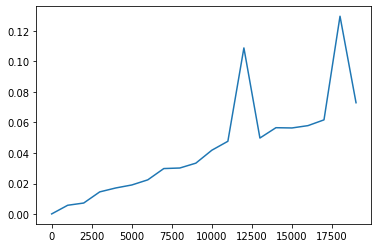

In [41]:
random.seed(0)
test_perfomance(quick_vector_sort)

In [42]:
random.seed(0)
pseudo_generator_kwargs = dict(
                l_border=0,
                r_border = 1000,
                n_vectors=50000, 
                n_points=50000        
            )
test_samples = generate_test_samples(**pseudo_generator_kwargs)

In [43]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 62.5 ms
Wall time: 65.8 ms
